In [12]:
import pandas as pd
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


In [13]:


# # load the karate club graph
# G = nx.karate_club_graph()

# #first compute the best partition
# partition = community_louvain.best_partition(G)

# # draw the graph
# pos = nx.spring_layout(G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.show()

In [14]:
df = pd.read_csv("../IEEE VIS papers 1990-2021 - Main dataset.csv")
df = df[['AuthorNames']]
print(df.columns)
print(df.describe())
df = df.dropna()
print(df.describe())

Index(['AuthorNames'], dtype='object')
          AuthorNames
count            3499
unique           3368
top     L.A. Treinish
freq                6
          AuthorNames
count            3499
unique           3368
top     L.A. Treinish
freq                6


In [15]:
authors = df['AuthorNames'].to_list()

In [16]:
import networkx as nx
# import community as community_louvain
from community import community_louvain

In [17]:
G = nx.Graph()

In [18]:
for current in authors:
	# print(current)
	lst = current.split(";")
	for i in range(len(lst)):
		for j in range(i+1, len(lst)):
			G.add_edge(lst[i], lst[j])

In [27]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=0.003)

    pos_nodes = _position_nodes(g, partition, scale=0.01)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(g):
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    

    # g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=list(partition.values())); 
    plt.show()
    return

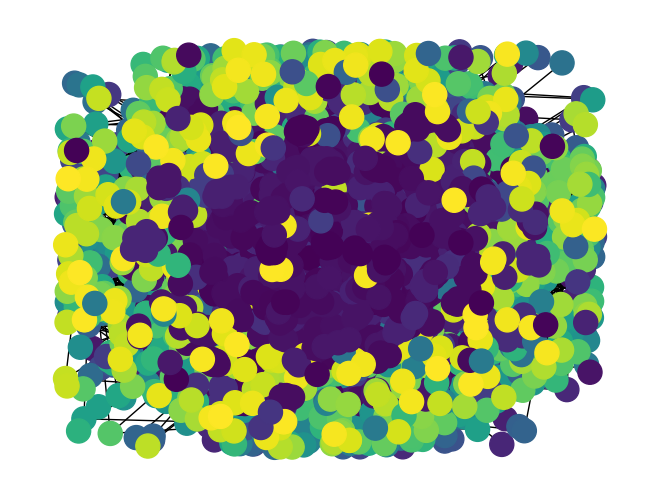

In [28]:
test(G)

In [30]:
from netgraph import Graph


In [32]:
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# since we created the graph, we know the best partition:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)



In [33]:
print(node_to_community)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 3, 61: 3, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3, 88: 3, 89: 3, 90: 3, 91: 3, 92: 3, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 3, 99: 3}


In [35]:
partition = community_louvain.best_partition(G)
# pos = community_layout(G, partition)

In [39]:
# print(partition)
node = []
comm = []
for key in partition:
    node.append(key)
    comm.append(partition[key])

In [40]:
df = pd.DataFrame({"author": node, "community": comm})

In [42]:
df.to_csv("community.csv", index=False)

In [54]:
test = df['community'].value_counts().to_tuple()

AttributeError: 'Series' object has no attribute 'to_tuple'

In [55]:
def dictToCSV(d, name1, name2, filename):
    node = []
    comm = []
    for key in d:
        node.append(key)
        comm.append(d[key])
    
    df = pd.DataFrame({name1: node, name2: comm})
    df.to_csv(filename, index=False)

In [56]:
dictToCSV(test, "community", "population", "community_stats.csv")

In [ ]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()